Original dataset found [here](https://www.kaggle.com/akulbahl/covid19-airline-flight-delays-and-cancellations)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [ ]:
#from google.colab import drive

#drive.mount('/content/drive')

#path_to_dataset = '/content/drive/My Drive/CISC849/CISC849013/jantojun2020.csv'
path_to_dataset = 'C:\Coding\CISC849\jantojun2020_dropped_feature.csv'
dataset = pd.read_csv(path_to_dataset)

In [ ]:
dataset = dataset.drop(columns = ['YEAR', 'FL_DATE', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 
                                  'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'TAIL_NUM',
                                  'ARR_DEL15', 'ARR_DELAY_GROUP', 'CANCELLATION_CODE', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 
                                 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'ORIGIN_STATE_ABR',
                                 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM'])
dataset.to_csv("/content/drive/My Drive/CISC849/CISC849013/jantojun2020_dropped_feature.csv", index = False)

In [ ]:
dataset.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME_BLK,CANCELLED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,1,1,1,3,WN,5888,ONT,SFO,1810,1800-1859,1945,1900-1959,0,95.0,363,2
1,1,1,1,3,WN,6276,ONT,SFO,1150,1100-1159,1320,1300-1359,0,90.0,363,2
2,1,1,1,3,WN,4598,ONT,SJC,2020,2000-2059,2130,2100-2159,0,70.0,333,2
3,1,1,1,3,WN,4761,ONT,SJC,1340,1300-1359,1455,1400-1459,0,75.0,333,2
4,1,1,1,3,WN,5162,ONT,SJC,915,0900-0959,1035,1000-1059,0,80.0,333,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745847 entries, 0 to 2745846
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   QUARTER             int64  
 1   MONTH               int64  
 2   DAY_OF_MONTH        int64  
 3   DAY_OF_WEEK         int64  
 4   MKT_UNIQUE_CARRIER  object 
 5   MKT_CARRIER_FL_NUM  int64  
 6   ORIGIN              object 
 7   DEST                object 
 8   CRS_DEP_TIME        int64  
 9   DEP_TIME_BLK        object 
 10  CRS_ARR_TIME        int64  
 11  ARR_TIME_BLK        object 
 12  CANCELLED           int64  
 13  CRS_ELAPSED_TIME    float64
 14  DISTANCE            int64  
 15  DISTANCE_GROUP      int64  
dtypes: float64(1), int64(10), object(5)
memory usage: 335.2+ MB


In [ ]:
dataset.corr()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_FL_NUM,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
QUARTER,1.000000,0.836982,-0.045156,0.014678,-0.034586,-0.024229,0.000319,0.192005,-0.078328,-0.040050,-0.039242
MONTH,0.836982,1.000000,-0.014982,0.005133,-0.037768,-0.021329,0.000182,0.152751,-0.069281,-0.029479,-0.028727
DAY_OF_MONTH,-0.045156,-0.014982,1.000000,-0.014716,-0.006516,-0.002329,0.000430,0.088473,-0.005876,-0.003203,-0.002966
DAY_OF_WEEK,0.014678,0.005133,-0.014716,1.000000,0.055854,0.003881,0.002542,0.000071,0.011771,0.014977,0.014925
MKT_CARRIER_FL_NUM,-0.034586,-0.037768,-0.006516,0.055854,1.000000,0.002067,0.001360,-0.010097,-0.315813,-0.357796,-0.354147
CRS_DEP_TIME,-0.024229,-0.021329,-0.002329,0.003881,0.002067,1.000000,0.725967,-0.006200,-0.029319,-0.016492,-0.017281
CRS_ARR_TIME,0.000319,0.000182,0.000430,0.002542,0.001360,0.725967,1.000000,-0.011590,0.024514,0.028160,0.031503
CANCELLED,0.192005,0.152751,0.088473,0.000071,-0.010097,-0.006200,-0.011590,1.000000,-0.019571,-0.011512,-0.011058
CRS_ELAPSED_TIME,-0.078328,-0.069281,-0.005876,0.011771,-0.315813,-0.029319,0.024514,-0.019571,1.000000,0.976866,0.965460
DISTANCE,-0.040050,-0.029479,-0.003203,0.014977,-0.357796,-0.016492,0.028160,-0.011512,0.976866,1.000000,0.987203


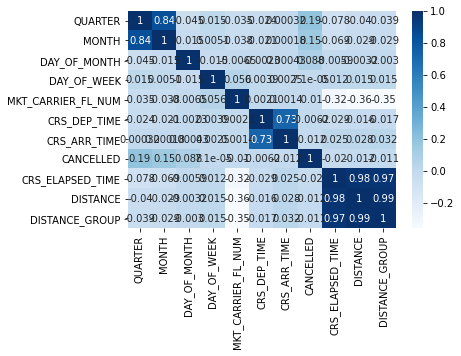

In [ ]:
matrix = sns.heatmap(dataset.corr(), cmap = "Blues", annot = True)

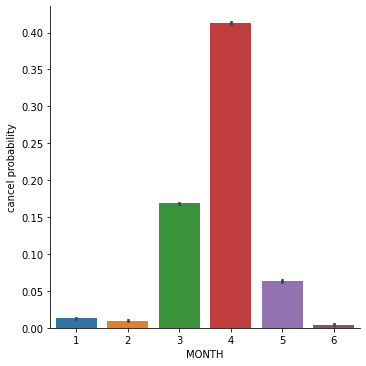

In [ ]:
plot = sns.catplot(x="MONTH", y="CANCELLED", kind="bar", data=dataset).set_ylabels("cancel probability")

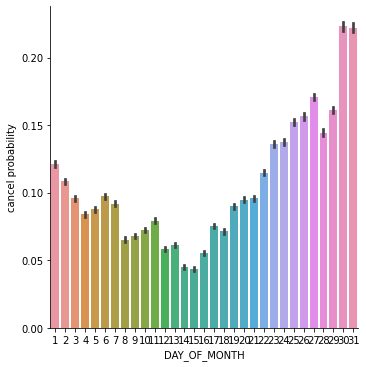

In [ ]:
plot = sns.catplot(x="DAY_OF_MONTH", y="CANCELLED", kind="bar", data=dataset).set_ylabels("cancel probability")

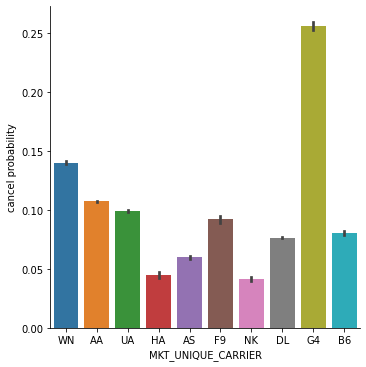

In [ ]:
plot = sns.catplot(x="MKT_UNIQUE_CARRIER", y="CANCELLED", kind="bar", data=dataset).set_ylabels("cancel probability")

In [ ]:
labelencoder_carrier = LabelEncoder()
dataset["MKT_UNIQUE_CARRIER"] = labelencoder_carrier.fit_transform(dataset["MKT_UNIQUE_CARRIER"])
dataset

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME_BLK,CANCELLED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,1,1,1,3,9,5888,ONT,SFO,1810,1800-1859,1945,1900-1959,0,95.0,363,2
1,1,1,1,3,9,6276,ONT,SFO,1150,1100-1159,1320,1300-1359,0,90.0,363,2
2,1,1,1,3,9,4598,ONT,SJC,2020,2000-2059,2130,2100-2159,0,70.0,333,2
3,1,1,1,3,9,4761,ONT,SJC,1340,1300-1359,1455,1400-1459,0,75.0,333,2
4,1,1,1,3,9,5162,ONT,SJC,915,0900-0959,1035,1000-1059,0,80.0,333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745842,2,6,13,6,1,1209,SEA,HNL,1050,1000-1059,1405,1400-1459,0,375.0,2677,11
2745843,2,6,13,6,1,1216,PHX,SEA,1530,1500-1559,1826,1800-1859,0,176.0,1107,5
2745844,2,6,13,6,1,1217,SEA,PHX,1100,1100-1159,1405,1400-1459,0,185.0,1107,5
2745845,2,6,13,6,1,1223,SNA,SEA,1510,1500-1559,1755,1700-1759,0,165.0,978,4


In [ ]:
list(labelencoder_carrier.classes_)

['AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'HA', 'NK', 'UA', 'WN']

In [ ]:
labelencoder_origin = LabelEncoder()
dataset["ORIGIN"] = labelencoder_origin.fit_transform(dataset["ORIGIN"])
dataset

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME_BLK,CANCELLED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,1,1,1,3,9,5888,255,SFO,1810,1800-1859,1945,1900-1959,0,95.0,363,2
1,1,1,1,3,9,6276,255,SFO,1150,1100-1159,1320,1300-1359,0,90.0,363,2
2,1,1,1,3,9,4598,255,SJC,2020,2000-2059,2130,2100-2159,0,70.0,333,2
3,1,1,1,3,9,4761,255,SJC,1340,1300-1359,1455,1400-1459,0,75.0,333,2
4,1,1,1,3,9,5162,255,SJC,915,0900-0959,1035,1000-1059,0,80.0,333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745842,2,6,13,6,1,1209,320,HNL,1050,1000-1059,1405,1400-1459,0,375.0,2677,11
2745843,2,6,13,6,1,1216,271,SEA,1530,1500-1559,1826,1800-1859,0,176.0,1107,5
2745844,2,6,13,6,1,1217,320,PHX,1100,1100-1159,1405,1400-1459,0,185.0,1107,5
2745845,2,6,13,6,1,1223,336,SEA,1510,1500-1559,1755,1700-1759,0,165.0,978,4


In [ ]:
list(labelencoder_origin.classes_)

['ABE',
 'ABI',
 'ABQ',
 'ABR',
 'ABY',
 'ACK',
 'ACT',
 'ACV',
 'ACY',
 'ADK',
 'ADQ',
 'AEX',
 'AGS',
 'AKN',
 'ALB',
 'ALO',
 'ALW',
 'AMA',
 'ANC',
 'APN',
 'ART',
 'ASE',
 'ATL',
 'ATW',
 'ATY',
 'AUS',
 'AVL',
 'AVP',
 'AZA',
 'AZO',
 'BDL',
 'BET',
 'BFF',
 'BFL',
 'BFM',
 'BGM',
 'BGR',
 'BHM',
 'BIL',
 'BIS',
 'BJI',
 'BKG',
 'BLI',
 'BLV',
 'BMI',
 'BNA',
 'BOI',
 'BOS',
 'BPT',
 'BQK',
 'BQN',
 'BRD',
 'BRO',
 'BRW',
 'BTM',
 'BTR',
 'BTV',
 'BUF',
 'BUR',
 'BWI',
 'BZN',
 'CAE',
 'CAK',
 'CDB',
 'CDC',
 'CDV',
 'CGI',
 'CHA',
 'CHO',
 'CHS',
 'CID',
 'CIU',
 'CKB',
 'CLE',
 'CLL',
 'CLT',
 'CMH',
 'CMI',
 'CMX',
 'CNY',
 'COD',
 'COS',
 'COU',
 'CPR',
 'CRP',
 'CRW',
 'CSG',
 'CVG',
 'CWA',
 'CYS',
 'DAB',
 'DAL',
 'DAY',
 'DBQ',
 'DCA',
 'DDC',
 'DEC',
 'DEN',
 'DFW',
 'DHN',
 'DIK',
 'DLG',
 'DLH',
 'DRO',
 'DRT',
 'DSM',
 'DTW',
 'DVL',
 'EAR',
 'EAT',
 'EAU',
 'ECP',
 'EGE',
 'EKO',
 'ELM',
 'ELP',
 'ERI',
 'ESC',
 'EUG',
 'EVV',
 'EWN',
 'EWR',
 'EYW',
 'FAI',
 'FAR',


In [ ]:
dataset["DEST"] = labelencoder_origin.transform(dataset["DEST"])
dataset

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME_BLK,CANCELLED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,1,1,1,3,9,5888,255,322,1810,1800-1859,1945,1900-1959,0,95.0,363,2
1,1,1,1,3,9,6276,255,322,1150,1100-1159,1320,1300-1359,0,90.0,363,2
2,1,1,1,3,9,4598,255,329,2020,2000-2059,2130,2100-2159,0,70.0,333,2
3,1,1,1,3,9,4761,255,329,1340,1300-1359,1455,1400-1459,0,75.0,333,2
4,1,1,1,3,9,5162,255,329,915,0900-0959,1035,1000-1059,0,80.0,333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745842,2,6,13,6,1,1209,320,159,1050,1000-1059,1405,1400-1459,0,375.0,2677,11
2745843,2,6,13,6,1,1216,271,320,1530,1500-1559,1826,1800-1859,0,176.0,1107,5
2745844,2,6,13,6,1,1217,320,271,1100,1100-1159,1405,1400-1459,0,185.0,1107,5
2745845,2,6,13,6,1,1223,336,320,1510,1500-1559,1755,1700-1759,0,165.0,978,4


In [ ]:
labelencoder_time_blk = LabelEncoder()
dataset["DEP_TIME_BLK"] = labelencoder_time_blk.fit_transform(dataset["DEP_TIME_BLK"])
dataset["ARR_TIME_BLK"] = labelencoder_time_blk.transform(dataset["ARR_TIME_BLK"])
dataset

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME_BLK,CANCELLED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,1,1,1,3,9,5888,255,322,1810,13,1945,14,0,95.0,363,2
1,1,1,1,3,9,6276,255,322,1150,6,1320,8,0,90.0,363,2
2,1,1,1,3,9,4598,255,329,2020,15,2130,16,0,70.0,333,2
3,1,1,1,3,9,4761,255,329,1340,8,1455,9,0,75.0,333,2
4,1,1,1,3,9,5162,255,329,915,4,1035,5,0,80.0,333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745842,2,6,13,6,1,1209,320,159,1050,5,1405,9,0,375.0,2677,11
2745843,2,6,13,6,1,1216,271,320,1530,10,1826,13,0,176.0,1107,5
2745844,2,6,13,6,1,1217,320,271,1100,6,1405,9,0,185.0,1107,5
2745845,2,6,13,6,1,1223,336,320,1510,10,1755,12,0,165.0,978,4


In [ ]:
list(labelencoder_time_blk.classes_)

['0001-0559',
 '0600-0659',
 '0700-0759',
 '0800-0859',
 '0900-0959',
 '1000-1059',
 '1100-1159',
 '1200-1259',
 '1300-1359',
 '1400-1459',
 '1500-1559',
 '1600-1659',
 '1700-1759',
 '1800-1859',
 '1900-1959',
 '2000-2059',
 '2100-2159',
 '2200-2259',
 '2300-2359']

In [ ]:
dataset.dropna()
dataset_x = dataset.drop(columns = ["CANCELLED"])
dataset_x.to_csv("C:\Coding\CISC849\dataset_x.csv", index = False)
dataset_y = dataset["CANCELLED"]
dataset_y.to_csv("C:\Coding\CISC849\dataset_y.csv", index = False)
#dataset_x = pd.read_csv("C:\Coding\CISC849\dataset_x.csv").to_numpy()
#dataset_y = pd.read_csv("C:\Coding\CISC849\dataset_y.csv").to_numpy()
dataset_y = dataset_y.ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, train_size=0.75, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2059385, 15)
(686462, 15)
(2059385,)
(686462,)


In [ ]:
tpot = TPOTClassifier(generations=5, population_size=40, verbosity=1, random_state=42, n_jobs = -1, warm_start = True, memory = "C:\Coding\CISC849\memory", periodic_checkpoint_folder = "C:\Coding\CISC849\tpot_checkpoint" , max_time_mins = 60)

In [ ]:
tpot.fit(X_train, y_train)



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=12, p=1, weights=distance)


TPOTClassifier(generations=5, max_time_mins=60,
               memory='C:\\Coding\\CISC849\\memory', n_jobs=-1,
               periodic_checkpoint_folder='C:\\Coding\\CISC849\tpot_checkpoint',
               population_size=40, random_state=42, verbosity=1,
               warm_start=True)

In [ ]:
tpot.export('tpot_digits_pipeline.py')

In [ ]:
print(tpot.evaluated_individuals_)

{'GaussianNB(input_matrix)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': 0.8940746873459794}, 'RandomForestClassifier(MinMaxScaler(input_matrix), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.2, RandomForestClassifier__min_samples_leaf=8, RandomForestClassifier__min_samples_split=4, RandomForestClassifier__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'XGBClassifier(MultinomialNB(input_matrix, MultinomialNB__alpha=10.0, MultinomialNB__fit_prior=False), XGBClassifier__learning_rate=0.01, XGBClassifier__max_depth=9, XGBClassifier__min_child_weight=13, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.45)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',

In [ ]:
print(tpot.fitted_pipeline_)

Pipeline(memory=Memory(location=C:\Coding\CISC849\memory\joblib),
         steps=[('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=12, p=1,
                                      weights='distance'))])


In [ ]:
print(tpot.score(X_test, y_test))

0.9189277775026149
